# Machine Learning Homework 4 - PART II

### Submission By:  
<ul>
    <li>Akshay Prakash Tambe (apt321@nyu.edu)</li>
    <li>Snahil Singh (ss11381@nyu.edu)</li>
</ul>

In [1]:
# Import Packages
import pandas as pd
import numpy as np

In [2]:
def load_data():
    # Loading Comma Seperated Data using read_table pandas function in 'reviews_train_data' dataframe
    reviews_train_data = pd.read_csv("reviewstrain.txt", delimiter="\t", header=None)
    reviews_train_data = pd.DataFrame(reviews_train_data)

    # Splitting Dataset into "labels" and "reviews_text"
    reviews_train_data = pd.DataFrame(reviews_train_data[0].str.split(' ',1).tolist(), columns = ['label','reviews_text'])

    # Loading Comma Seperated Data using read_table pandas function in 'reviews_test_data' dataframe
    reviews_test_data = pd.read_csv("reviewstest.txt", delimiter="\t", header=None)
    reviews_test_data = pd.DataFrame(reviews_test_data)

    # Splitting Dataset into "labels" and "reviews_text"
    reviews_test_data = pd.DataFrame(reviews_test_data[0].str.split(' ',1).tolist(), columns = ['label','reviews_text'])
    return reviews_train_data, reviews_test_data

In [3]:
# Loading Data
reviews_train_data, reviews_test_data = load_data()

# Creating Vocabulary
reviews_words = reviews_train_data.reviews_text
vocab = []
for line in reviews_words:
    words = line.split()
    for word in words:
        if word not in vocab:
            vocab.append(word)
vocab = ['label'] + vocab
print("Voculabury of "+str(len(vocab))+" words")
print(vocab)

Voculabury of 5862 words
['label', 'a', 'stirring', ',', 'funny', 'and', 'finally', 'transporting', 're-imagining', 'of', 'beauty', 'the', 'beast', '1930s', 'horror', 'films', 'real', 'winner', '--', 'smart', 'subtle', 'resonant', '.', 'dim-witted', 'lazy', 'spin-off', 'animal', 'planet', 'documentary', 'series', 'crocodile', 'hunter', 'is', 'entertainment', 'opportunism', 'at', 'its', 'most', 'glaring', '`', 'anyone', 'with', 'passion', 'for', 'cinema', 'indeed', 'sex', 'should', 'see', 'it', 'as', 'soon', 'possible', "'", 'crass', 'insulting', 'homage', 'to', 'great', 'like', 'some', 'hot', 'john', 'wayne', 'classics', 'an', 'infuriating', 'film', 'stealing', 'harvard', 'will', 'dip', 'into', 'your', 'wallet', 'swipe', '90', 'minutes', 'time', 'offer', 'you', 'precisely', 'this', 'in', 'recompense', ':', 'few', 'early', 'laughs', 'scattered', 'around', 'plot', 'thin', 'repetitious', 'poignant', 'lyricism', 'runs', 'through', 'balzac', 'little', 'chinese', 'seamstress', 'that', 'trans

In [4]:
def transform(dataset):
    # Data Transformation - One Hot-Encoding in Dataframe
    transformed_df = pd.DataFrame(columns=vocab)
    data = []
    for index,review in dataset.iterrows():
        line = review['reviews_text']
        label = review['label']
        line_result = []
        line_result.append(label)
        words = line.split()
        for word in vocab[1:]:
            if word not in words:
                line_result.append(0)
            else:
                line_result.append(1)        
        data.append(line_result)   
    transformed_df = transformed_df.append(pd.DataFrame(data, columns=vocab))
    return transformed_df

In [5]:
transform_train_df = transform(reviews_train_data)
transform_test_df = transform(reviews_test_data)

In [6]:
import math

# Calculates Information Gain
def info_gain_cal(parent_entropy,child1, entropy_child1, child2, entropy_child2):
    total = child1 + child2
    child1_ratio = child1/total
    child2_ratio = child2/total
    info_gain = (parent_entropy) - ((child1_ratio *entropy_child1) + (child2_ratio *entropy_child2))
    return info_gain

# Calculates Entropy
def entropy_cal(child_class0, child_class1):
    child_total = child_class0 + child_class1
    class0_ratio = child_class0/child_total
    class1_ratio = child_class1/child_total
    entropy_child = 0 
    if(class0_ratio != 0):
        entropy_child = entropy_child - ((class0_ratio)*math.log2(class0_ratio))
    if(class1_ratio != 0):
        entropy_child = entropy_child - ((class1_ratio)*math.log2(class1_ratio))
    return entropy_child

In [7]:
# Calculating Information gain for all attributes
attribute_info_gain = []
df_class0 = transform_train_df[(transform_train_df['label'] == "0")]
df_class1 = transform_train_df[(transform_train_df['label'] == "1")]

# Calculate Parent Entropy
parent_entropy = entropy_cal(len(df_class0),len(df_class1))
print("Class 0 Size = " +str(len(df_class0)))
print("Class 1 Size = " +str(len(df_class1)))
print("Parent Entropy = "+ str(parent_entropy))

# Calculate Attributes Info-gain
for name in vocab[1:]:
    df_child1_class0 = transform_train_df[(transform_train_df[name] == 0) & (transform_train_df['label'] == "0")]
    df_child1_class1 = transform_train_df[(transform_train_df[name] == 0) & (transform_train_df['label'] == "1")]
    df_child2_class0 = transform_train_df[(transform_train_df[name] == 1) & (transform_train_df['label'] == "0")]
    df_child2_class1 = transform_train_df[(transform_train_df[name] == 1) & (transform_train_df['label'] == "1")]
    entropy_child1 = entropy_cal(len(df_child1_class0),len(df_child1_class1))
    entropy_child2 = entropy_cal(len(df_child2_class0),len(df_child2_class1))
    info_gain =  info_gain_cal(parent_entropy,len(df_child1_class0)+len(df_child1_class1), entropy_child1, len(df_child2_class0)+len(df_child2_class1), entropy_child2)
    attribute_info_gain.append(info_gain)
print("Total Info-Gain Attributes Calculated = "+str(len(attribute_info_gain))) 

Class 0 Size = 689
Class 1 Size = 811
Parent Entropy = 0.9952229310409331
Total Info-Gain Attributes Calculated = 5861


### Question 5.A: List the 5 tokens that occur most frequently in the training set.

In [31]:
# List the 5 tokens that occur most frequently in the training set
most_frequent = transform_train_df.loc[:, transform_train_df.columns != 'label'].sum()
most_frequent = most_frequent.nlargest(5)
most_frequent

.      1426.0
,       816.0
the     780.0
and     737.0
a       722.0
dtype: float64

### Question 5.B: Using just the training documents, calculate the information gain of every attribute. List the 5 attributes with the highest information gain.

In [32]:
# Finding Top 5
attributes_info_gain_df = {'Attribute':vocab[1:],'Infogain':attribute_info_gain}
top_5_ig_attributes = pd.DataFrame(attributes_info_gain_df)
top_5_ig_attributes = top_5_ig_attributes.nlargest(5,'Infogain')
top_5_ig_attributes

Attribute  Infogain
229       bad  0.023921
268      best  0.019523
162       n't  0.013443
793       too  0.011238
259    moving  0.011049

In [33]:
# Find Top k attributes
def top_k_attributes(k):
    top_k_ig_attributes = pd.DataFrame(attributes_info_gain_df)
    top_k_ig_attributes = top_k_ig_attributes.nlargest(k,'Infogain')
    top_k_attribute_names = set(transform_train_df.columns).intersection(set(top_k_ig_attributes.Attribute))
    return top_k_attribute_names

top_50_attribute_names = top_k_attributes(50)
top_50_attribute_names

{"'",
 '?',
 'and',
 'any',
 'around',
 'bad',
 'beautifully',
 'best',
 'contrived',
 'documentary',
 'dull',
 'entertaining',
 'excellent',
 'get',
 'heart',
 'hilarious',
 'if',
 'intriguing',
 'it',
 'jokes',
 'long',
 'love',
 'mess',
 'minutes',
 'movie',
 'moving',
 "n't",
 'no',
 'or',
 'performance',
 'performances',
 'plot',
 'poor',
 'poorly',
 'portrait',
 'powerful',
 'rare',
 'script',
 'solid',
 'stupid',
 'terrible',
 'things',
 'this',
 'too',
 'touching',
 'unfunny',
 'why',
 'with',
 'worst',
 'would'}

In [34]:
# Find Top k Features
def get_top_k_features(transformed_df, top_k_attribute_names):
    feature_df = transformed_df.copy()
    data_columns = []

    # Removing other attributes
    for each in transformed_df.columns:
        if each in top_k_attribute_names:
            data_columns.append(each)
        elif each == 'label':
                data_columns.append(each)
        else:
            pass

    feature_df = feature_df[data_columns]
    return feature_df

training_df = get_top_k_features(transform_train_df, top_50_attribute_names)
training_df.head()

label and documentary with it  ' minutes this around plot ...  things  ?  \
0     1   1           0    0  0  0       0    0      0    0 ...       0  0   
1     1   1           0    0  0  0       0    0      0    0 ...       0  0   
2     0   1           1    0  0  0       0    0      0    0 ...       0  0   
3     1   1           0    1  1  1       0    0      0    0 ...       0  0   
4     0   1           0    0  1  0       0    0      0    0 ...       0  0   

  rare excellent beautifully jokes mess unfunny poorly poor  
0    0         0           0     0    0       0      0    0  
1    0         0           0     0    0       0      0    0  
2    0         0           0     0    0       0      0    0  
3    0         0           0     0    0       0      0    0  
4    0         0           0     0    0       0      0    0  

[5 rows x 51 columns]

In [35]:
# Backpropagation and Error Function
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# I is matrix of input examples
# D is matrix of output examples
# n_hidden is number of nodes in hidden layer
# n_max is number of training epochs
def bp(I,D,n_hidden,eta,n_max):
    np.random.seed(1926)
    
    r_inp, c_inp = I.shape
    n_examples = r_inp
    n_input    = c_inp
    r_out,c_out = D.shape
    n_output   = c_out

    w = np.random.random((n_input, n_hidden))
    wb = np.random.random(n_hidden)
    v = np.random.random((n_hidden, n_output))
    vb = np.random.random(n_output)
    err_curve = np.zeros((n_max,c_out))

    for n in range(n_max):
        sq_err_sum = np.zeros((1,n_output))
    
        for k in range(n_examples):
            x = I[k,:].reshape([1,-1])
            z = sigmoid(x.dot(w)+wb)
            y = sigmoid(z.dot(v)+vb)
            err = -(D[k,:]*np.log(y) + (1-D[k,:])*np.log(1-y)).reshape([1,-1])
            sq_err_sum += -(D[k,:]*np.log(y) + (1-D[k,:])*np.log(1-y))
            #err = (D[k,:] - y).reshape([1,-1])
            #sq_err_sum += 0.5*np.square(err)
            
            #Delta_output = err*(1-y)*y 
            Delta_output = D[k,:] - y
            Delta_v = z.T.dot(Delta_output)
            Delta_vb = np.sum(Delta_output,axis=0)

            Delta_hidden = Delta_output.dot(v.T)*(1-z)*z
            Delta_w = x.T.dot(Delta_hidden) 
            Delta_wb = np.sum(Delta_hidden,axis=0) 
        
            v += eta*Delta_v
            vb += eta*Delta_vb
            w += eta*Delta_w
            wb += eta*Delta_wb

            err_curve[n] = sq_err_sum/n_examples
    
        print('epoch %d: err %f'%(n,np.mean(sq_err_sum)/n_examples))
    
    plt.plot(np.linspace(0,n_max-1,n_max),np.mean(err_curve,axis=1))        
    plt.show()
    return w,wb,v,vb,err_curve 

In [36]:
# Convert to np.array format for modeling
def convert_df_to_nparray(df):
    # Convert Dataset to np.array format for training dataset
    df_input = df.drop('label',1)
    df_output = df['label']
    df_input = np.array(df_input.values.tolist())
    df_output = np.asarray(df_output.values)
    df_output = df_output.astype(int)
    return df_input, df_output

training_df_input, training_df_output = convert_df_to_nparray(training_df)

epoch 0: err 0.703604
epoch 1: err 0.690296
epoch 2: err 0.689125
epoch 3: err 0.687870
epoch 4: err 0.686409
epoch 5: err 0.684597
epoch 6: err 0.682248
epoch 7: err 0.679145
epoch 8: err 0.675065
epoch 9: err 0.669885
epoch 10: err 0.663691
epoch 11: err 0.656802
epoch 12: err 0.649628
epoch 13: err 0.642477
epoch 14: err 0.635486
epoch 15: err 0.628660
epoch 16: err 0.621945
epoch 17: err 0.615286
epoch 18: err 0.608654
epoch 19: err 0.602052
epoch 20: err 0.595509
epoch 21: err 0.589069
epoch 22: err 0.582780
epoch 23: err 0.576686
epoch 24: err 0.570821
epoch 25: err 0.565209
epoch 26: err 0.559863
epoch 27: err 0.554791
epoch 28: err 0.549994
epoch 29: err 0.545468
epoch 30: err 0.541210
epoch 31: err 0.537211
epoch 32: err 0.533465
epoch 33: err 0.529961
epoch 34: err 0.526692
epoch 35: err 0.523646
epoch 36: err 0.520813
epoch 37: err 0.518182
epoch 38: err 0.515741
epoch 39: err 0.513478
epoch 40: err 0.511382
epoch 41: err 0.509438
epoch 42: err 0.507637
epoch 43: err 0.50596

epoch 347: err 0.474062
epoch 348: err 0.474048
epoch 349: err 0.474034
epoch 350: err 0.474020
epoch 351: err 0.474006
epoch 352: err 0.473991
epoch 353: err 0.473977
epoch 354: err 0.473962
epoch 355: err 0.473947
epoch 356: err 0.473932
epoch 357: err 0.473917
epoch 358: err 0.473902
epoch 359: err 0.473887
epoch 360: err 0.473871
epoch 361: err 0.473856
epoch 362: err 0.473840
epoch 363: err 0.473824
epoch 364: err 0.473808
epoch 365: err 0.473792
epoch 366: err 0.473776
epoch 367: err 0.473759
epoch 368: err 0.473743
epoch 369: err 0.473726
epoch 370: err 0.473709
epoch 371: err 0.473692
epoch 372: err 0.473675
epoch 373: err 0.473658
epoch 374: err 0.473640
epoch 375: err 0.473623
epoch 376: err 0.473605
epoch 377: err 0.473587
epoch 378: err 0.473569
epoch 379: err 0.473551
epoch 380: err 0.473532
epoch 381: err 0.473514
epoch 382: err 0.473495
epoch 383: err 0.473476
epoch 384: err 0.473457
epoch 385: err 0.473438
epoch 386: err 0.473419
epoch 387: err 0.473399
epoch 388: err 0

epoch 690: err 0.464962
epoch 691: err 0.464944
epoch 692: err 0.464926
epoch 693: err 0.464909
epoch 694: err 0.464891
epoch 695: err 0.464874
epoch 696: err 0.464857
epoch 697: err 0.464839
epoch 698: err 0.464822
epoch 699: err 0.464805
epoch 700: err 0.464788
epoch 701: err 0.464771
epoch 702: err 0.464755
epoch 703: err 0.464738
epoch 704: err 0.464721
epoch 705: err 0.464705
epoch 706: err 0.464688
epoch 707: err 0.464672
epoch 708: err 0.464656
epoch 709: err 0.464640
epoch 710: err 0.464624
epoch 711: err 0.464608
epoch 712: err 0.464592
epoch 713: err 0.464576
epoch 714: err 0.464561
epoch 715: err 0.464545
epoch 716: err 0.464530
epoch 717: err 0.464514
epoch 718: err 0.464499
epoch 719: err 0.464484
epoch 720: err 0.464468
epoch 721: err 0.464453
epoch 722: err 0.464438
epoch 723: err 0.464423
epoch 724: err 0.464409
epoch 725: err 0.464394
epoch 726: err 0.464379
epoch 727: err 0.464365
epoch 728: err 0.464350
epoch 729: err 0.464336
epoch 730: err 0.464322
epoch 731: err 0

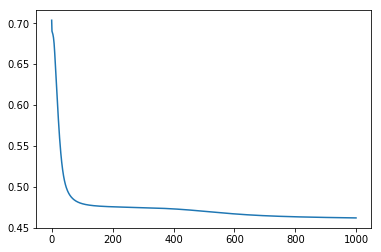

In [37]:
# Run for Top 50 Attributes
w,wb,v,vb,err_curve = bp(training_df_input, training_df_output.reshape([-1,1]), 2, 0.01, 1000);

In [38]:
# Predictions on test dataset
def NNPredictions(w, wb, v, vb, test_data):
    
    test_labels = []
    
    for x in test_data:
        z = sigmoid(x.dot(w)+wb)
        y = sigmoid(z.dot(v)+vb)
        
        if y > 0.5:
            test_labels.append(1)
        else:
            test_labels.append(0)
            
    return test_labels

In [39]:
testing_df = get_top_k_features(transform_test_df, top_50_attribute_names)
testing_df_input, testing_df_output = convert_df_to_nparray(testing_df)

predictions = NNPredictions(w, wb, v, vb, testing_df_input)
# Adding Predicted Label in Test Dataset
predicted_test_data = {
    'actual_label': testing_df['label'],
    'predicted_label': predictions
}
predicted_test_data = pd.DataFrame(predicted_test_data)

In [40]:
# Get Accuracy, TP/TN/FP/FN of the Model
def get_model_metrics(predicted_test_data):
    # Initializing variables
    correct_pred = 0
    total_pred = 0
    true_positive = 0
    true_negative = 0
    false_positive = 0
    false_negative = 0
    
    for row in predicted_test_data.itertuples():
        total_pred = total_pred + 1
        # Correct Predictions
        if int(row.actual_label) == int(row.predicted_label):
            correct_pred = correct_pred + 1
            # True Positive
            if (int(row.actual_label) == 1 and int(row.predicted_label) == 1):
                true_positive = true_positive + 1
            # True Negative
            elif  (int(row.actual_label) == 0 and int(row.predicted_label) == 0):   
                    true_negative = true_negative + 1
        # False Positive
        elif  (int(row.actual_label) == 0 and int(row.predicted_label) == 1):   
                false_positive = false_positive + 1
        # False Negative
        elif  (int(row.actual_label) == 1 and int(row.predicted_label) == 0):   
                false_negative = false_negative + 1
    # Accuracy
    accuracy = (correct_pred/total_pred)*100
    tpr = true_positive/(true_positive + false_negative)
    fpr = false_positive/(false_positive + true_negative)
    
    # Model Metrics Dataframe
    model_metrics = {
        'total_predictions': total_pred, 
        'correct_predictions': correct_pred, 
        'accuracy': accuracy, 
        'true_positive': true_positive, 
        'false_positive': false_positive, 
        'true_negative': true_negative, 
        'false_negative': false_negative,
        'tpr': tpr,
        'fpr': fpr
    }
    
    return model_metrics

In [42]:
model_metrics = get_model_metrics(predicted_test_data)
print("Confusion Matrix")
print("True Positive = " + str(model_metrics['true_positive']) \
      + "\tFalse Negative = " + str(model_metrics['false_negative']))
print("False Positive = " + str(model_metrics['false_positive']) \
      + "\tTrue Negative = " + str(model_metrics['true_negative']))
print("--------------------------------------------------------------------------")
print("Neural Network Accuracy (In Percentage) = " +str(model_metrics['accuracy']))

Confusion Matrix
True Positive = 231	False Negative = 42
False Positive = 113	True Negative = 114
--------------------------------------------------------------------------
Neural Network Accuracy (In Percentage) = 69.0


### Question 5.D: What percentage accuracy is achieved if you use Zero-R, instead of a neural net?

In [43]:
# Zero-R Classifier
def zero_r_classifier(reviews_test_data, reviews_train_data):
    label_1 = reviews_train_data['label'].value_counts()[0]
    label_0 = reviews_train_data['label'].value_counts()[1]
    
    # Majority in training set is Zero-R Label
    if label_1 > label_0:
        zero_r_label = 1
    else: 
        zero_r_label = 0
    
    # Adding Zero-R Predicted Label in Test Dataset
    predicted_test_data = {
        'testdata_reviews_text': reviews_test_data.reviews_text,
        'actual_label': reviews_test_data.label,
        'predicted_label': zero_r_label
    }
    predicted_test_data = pd.DataFrame(predicted_test_data)
    return predicted_test_data

In [44]:
# Running Zero R Classifier on given datasets
predicted_test_data = zero_r_classifier(reviews_test_data, reviews_train_data)
model_metrics = get_model_metrics(predicted_test_data)
print("Zero-R Classifier Accuracy (In Percentage) = " +str(model_metrics['accuracy']))

Zero-R Classifier Accuracy (In Percentage) = 54.6


## Question 5.E:
We used only the top 50 attributes, but we could have used the top k attributes, for larger or
smaller k. Why is it reasonable to think that increasing the number of attributes might increase
accuracy? Why is it reasonable to think that decreasing the number of attributes might increase
accuracy? Answer both questions. 

As we increase the number of attributes for our neural net, while training the data we're making the model more adaptive and it starts learning more details, this helps in increasing the accuracy to a point, but if we increase furthermore, we see that our model has learned even very small details which may lead to overfitting because it decreases the generalization of the model. So, the increase in attributes helps in increasing the accuracy of the model to a certain point but after that, it may lead to overfitting resulting.

## Question 5.F:
Perform experiments to see how accuracy changes as you vary the number k of attributes for
your neural net. Choose at least 4 values of k (in addition to k = 50) and graph the results.
The horizontal axis should correspond to the number of attributes, and the vertical to the test
accuracy. Did the results surprise you? Did you have any difficulties running the experiments?
Give the graph AND the answers to these two questions.

In [46]:
# Generic Neural Net Classifier Function (Pass k attribute values)
def neural_net_classfier(k):
    top_k_attribute_names = top_k_attributes(k)
    training_df = get_top_k_features(transform_train_df, top_k_attribute_names)
    training_df_input, training_df_output = convert_df_to_nparray(training_df)
    w,wb,v,vb,err_curve = bp(training_df_input, training_df_output.reshape([-1,1]), 2, 0.01, 1000)

    testing_df = get_top_k_features(transform_test_df, top_k_attribute_names)
    testing_df_input, testing_df_output = convert_df_to_nparray(testing_df)

    predictions = NNPredictions(w, wb, v, vb, testing_df_input)
    # Adding Predicted Label in Test Dataset
    predicted_test_data = {
        'actual_label': testing_df['label'],
        'predicted_label': predictions
    }
    predicted_test_data = pd.DataFrame(predicted_test_data)

    model_metrics = get_model_metrics(predicted_test_data)
    print("Neural Network Accuracy (In Percentage) = " +str(model_metrics['accuracy']))
    return model_metrics['accuracy']

epoch 0: err 0.695900
epoch 1: err 0.691360
epoch 2: err 0.691277
epoch 3: err 0.691202
epoch 4: err 0.691133
epoch 5: err 0.691064
epoch 6: err 0.690989
epoch 7: err 0.690904
epoch 8: err 0.690801
epoch 9: err 0.690675
epoch 10: err 0.690515
epoch 11: err 0.690310
epoch 12: err 0.690045
epoch 13: err 0.689701
epoch 14: err 0.689253
epoch 15: err 0.688670
epoch 16: err 0.687915
epoch 17: err 0.686943
epoch 18: err 0.685706
epoch 19: err 0.684161
epoch 20: err 0.682277
epoch 21: err 0.680054
epoch 22: err 0.677531
epoch 23: err 0.674784
epoch 24: err 0.671901
epoch 25: err 0.668958
epoch 26: err 0.665993
epoch 27: err 0.663008
epoch 28: err 0.659989
epoch 29: err 0.656922
epoch 30: err 0.653807
epoch 31: err 0.650663
epoch 32: err 0.647528
epoch 33: err 0.644444
epoch 34: err 0.641458
epoch 35: err 0.638607
epoch 36: err 0.635920
epoch 37: err 0.633412
epoch 38: err 0.631091
epoch 39: err 0.628955
epoch 40: err 0.627001
epoch 41: err 0.625218
epoch 42: err 0.623599
epoch 43: err 0.62213

epoch 347: err 0.605240
epoch 348: err 0.605235
epoch 349: err 0.605231
epoch 350: err 0.605226
epoch 351: err 0.605222
epoch 352: err 0.605218
epoch 353: err 0.605213
epoch 354: err 0.605209
epoch 355: err 0.605205
epoch 356: err 0.605200
epoch 357: err 0.605196
epoch 358: err 0.605192
epoch 359: err 0.605188
epoch 360: err 0.605184
epoch 361: err 0.605180
epoch 362: err 0.605176
epoch 363: err 0.605172
epoch 364: err 0.605168
epoch 365: err 0.605164
epoch 366: err 0.605160
epoch 367: err 0.605156
epoch 368: err 0.605152
epoch 369: err 0.605148
epoch 370: err 0.605144
epoch 371: err 0.605141
epoch 372: err 0.605137
epoch 373: err 0.605133
epoch 374: err 0.605130
epoch 375: err 0.605126
epoch 376: err 0.605123
epoch 377: err 0.605119
epoch 378: err 0.605115
epoch 379: err 0.605112
epoch 380: err 0.605109
epoch 381: err 0.605105
epoch 382: err 0.605102
epoch 383: err 0.605098
epoch 384: err 0.605095
epoch 385: err 0.605092
epoch 386: err 0.605089
epoch 387: err 0.605085
epoch 388: err 0

epoch 689: err 0.604513
epoch 690: err 0.604512
epoch 691: err 0.604510
epoch 692: err 0.604509
epoch 693: err 0.604507
epoch 694: err 0.604506
epoch 695: err 0.604505
epoch 696: err 0.604503
epoch 697: err 0.604502
epoch 698: err 0.604500
epoch 699: err 0.604499
epoch 700: err 0.604498
epoch 701: err 0.604496
epoch 702: err 0.604495
epoch 703: err 0.604493
epoch 704: err 0.604492
epoch 705: err 0.604491
epoch 706: err 0.604489
epoch 707: err 0.604488
epoch 708: err 0.604486
epoch 709: err 0.604485
epoch 710: err 0.604484
epoch 711: err 0.604482
epoch 712: err 0.604481
epoch 713: err 0.604480
epoch 714: err 0.604478
epoch 715: err 0.604477
epoch 716: err 0.604475
epoch 717: err 0.604474
epoch 718: err 0.604473
epoch 719: err 0.604471
epoch 720: err 0.604470
epoch 721: err 0.604469
epoch 722: err 0.604467
epoch 723: err 0.604466
epoch 724: err 0.604465
epoch 725: err 0.604463
epoch 726: err 0.604462
epoch 727: err 0.604460
epoch 728: err 0.604459
epoch 729: err 0.604458
epoch 730: err 0

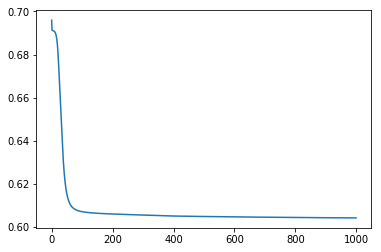

Neural Network Accuracy (In Percentage) = 60.0
epoch 0: err 0.691403
epoch 1: err 0.691648
epoch 2: err 0.691279
epoch 3: err 0.690911
epoch 4: err 0.690518
epoch 5: err 0.690071
epoch 6: err 0.689531
epoch 7: err 0.688850
epoch 8: err 0.687962
epoch 9: err 0.686777
epoch 10: err 0.685177
epoch 11: err 0.683012
epoch 12: err 0.680117
epoch 13: err 0.676366
epoch 14: err 0.671736
epoch 15: err 0.666369
epoch 16: err 0.660527
epoch 17: err 0.654468
epoch 18: err 0.648353
epoch 19: err 0.642233
epoch 20: err 0.636098
epoch 21: err 0.629932
epoch 22: err 0.623736
epoch 23: err 0.617542
epoch 24: err 0.611402
epoch 25: err 0.605378
epoch 26: err 0.599528
epoch 27: err 0.593900
epoch 28: err 0.588527
epoch 29: err 0.583434
epoch 30: err 0.578629
epoch 31: err 0.574115
epoch 32: err 0.569890
epoch 33: err 0.565945
epoch 34: err 0.562272
epoch 35: err 0.558858
epoch 36: err 0.555693
epoch 37: err 0.552762
epoch 38: err 0.550054
epoch 39: err 0.547556
epoch 40: err 0.545254
epoch 41: err 0.5431

epoch 345: err 0.509757
epoch 346: err 0.509746
epoch 347: err 0.509735
epoch 348: err 0.509725
epoch 349: err 0.509714
epoch 350: err 0.509704
epoch 351: err 0.509693
epoch 352: err 0.509683
epoch 353: err 0.509672
epoch 354: err 0.509662
epoch 355: err 0.509652
epoch 356: err 0.509642
epoch 357: err 0.509631
epoch 358: err 0.509621
epoch 359: err 0.509611
epoch 360: err 0.509601
epoch 361: err 0.509591
epoch 362: err 0.509581
epoch 363: err 0.509571
epoch 364: err 0.509562
epoch 365: err 0.509552
epoch 366: err 0.509542
epoch 367: err 0.509532
epoch 368: err 0.509523
epoch 369: err 0.509513
epoch 370: err 0.509504
epoch 371: err 0.509494
epoch 372: err 0.509485
epoch 373: err 0.509475
epoch 374: err 0.509466
epoch 375: err 0.509457
epoch 376: err 0.509448
epoch 377: err 0.509438
epoch 378: err 0.509429
epoch 379: err 0.509420
epoch 380: err 0.509411
epoch 381: err 0.509402
epoch 382: err 0.509393
epoch 383: err 0.509384
epoch 384: err 0.509376
epoch 385: err 0.509367
epoch 386: err 0

epoch 687: err 0.507870
epoch 688: err 0.507866
epoch 689: err 0.507861
epoch 690: err 0.507857
epoch 691: err 0.507852
epoch 692: err 0.507847
epoch 693: err 0.507843
epoch 694: err 0.507838
epoch 695: err 0.507834
epoch 696: err 0.507829
epoch 697: err 0.507824
epoch 698: err 0.507820
epoch 699: err 0.507815
epoch 700: err 0.507810
epoch 701: err 0.507806
epoch 702: err 0.507801
epoch 703: err 0.507796
epoch 704: err 0.507791
epoch 705: err 0.507787
epoch 706: err 0.507782
epoch 707: err 0.507777
epoch 708: err 0.507772
epoch 709: err 0.507767
epoch 710: err 0.507762
epoch 711: err 0.507758
epoch 712: err 0.507753
epoch 713: err 0.507748
epoch 714: err 0.507743
epoch 715: err 0.507738
epoch 716: err 0.507733
epoch 717: err 0.507728
epoch 718: err 0.507723
epoch 719: err 0.507718
epoch 720: err 0.507713
epoch 721: err 0.507708
epoch 722: err 0.507703
epoch 723: err 0.507698
epoch 724: err 0.507693
epoch 725: err 0.507688
epoch 726: err 0.507683
epoch 727: err 0.507678
epoch 728: err 0

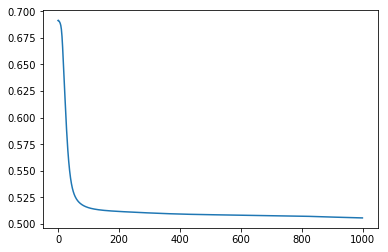

Neural Network Accuracy (In Percentage) = 69.6
epoch 0: err 0.703604
epoch 1: err 0.690296
epoch 2: err 0.689125
epoch 3: err 0.687870
epoch 4: err 0.686409
epoch 5: err 0.684597
epoch 6: err 0.682248
epoch 7: err 0.679145
epoch 8: err 0.675065
epoch 9: err 0.669885
epoch 10: err 0.663691
epoch 11: err 0.656802
epoch 12: err 0.649628
epoch 13: err 0.642477
epoch 14: err 0.635486
epoch 15: err 0.628660
epoch 16: err 0.621945
epoch 17: err 0.615286
epoch 18: err 0.608654
epoch 19: err 0.602052
epoch 20: err 0.595509
epoch 21: err 0.589069
epoch 22: err 0.582780
epoch 23: err 0.576686
epoch 24: err 0.570821
epoch 25: err 0.565209
epoch 26: err 0.559863
epoch 27: err 0.554791
epoch 28: err 0.549994
epoch 29: err 0.545468
epoch 30: err 0.541210
epoch 31: err 0.537211
epoch 32: err 0.533465
epoch 33: err 0.529961
epoch 34: err 0.526692
epoch 35: err 0.523646
epoch 36: err 0.520813
epoch 37: err 0.518182
epoch 38: err 0.515741
epoch 39: err 0.513478
epoch 40: err 0.511382
epoch 41: err 0.5094

epoch 345: err 0.474090
epoch 346: err 0.474076
epoch 347: err 0.474062
epoch 348: err 0.474048
epoch 349: err 0.474034
epoch 350: err 0.474020
epoch 351: err 0.474006
epoch 352: err 0.473991
epoch 353: err 0.473977
epoch 354: err 0.473962
epoch 355: err 0.473947
epoch 356: err 0.473932
epoch 357: err 0.473917
epoch 358: err 0.473902
epoch 359: err 0.473887
epoch 360: err 0.473871
epoch 361: err 0.473856
epoch 362: err 0.473840
epoch 363: err 0.473824
epoch 364: err 0.473808
epoch 365: err 0.473792
epoch 366: err 0.473776
epoch 367: err 0.473759
epoch 368: err 0.473743
epoch 369: err 0.473726
epoch 370: err 0.473709
epoch 371: err 0.473692
epoch 372: err 0.473675
epoch 373: err 0.473658
epoch 374: err 0.473640
epoch 375: err 0.473623
epoch 376: err 0.473605
epoch 377: err 0.473587
epoch 378: err 0.473569
epoch 379: err 0.473551
epoch 380: err 0.473532
epoch 381: err 0.473514
epoch 382: err 0.473495
epoch 383: err 0.473476
epoch 384: err 0.473457
epoch 385: err 0.473438
epoch 386: err 0

epoch 686: err 0.465034
epoch 687: err 0.465016
epoch 688: err 0.464998
epoch 689: err 0.464980
epoch 690: err 0.464962
epoch 691: err 0.464944
epoch 692: err 0.464926
epoch 693: err 0.464909
epoch 694: err 0.464891
epoch 695: err 0.464874
epoch 696: err 0.464857
epoch 697: err 0.464839
epoch 698: err 0.464822
epoch 699: err 0.464805
epoch 700: err 0.464788
epoch 701: err 0.464771
epoch 702: err 0.464755
epoch 703: err 0.464738
epoch 704: err 0.464721
epoch 705: err 0.464705
epoch 706: err 0.464688
epoch 707: err 0.464672
epoch 708: err 0.464656
epoch 709: err 0.464640
epoch 710: err 0.464624
epoch 711: err 0.464608
epoch 712: err 0.464592
epoch 713: err 0.464576
epoch 714: err 0.464561
epoch 715: err 0.464545
epoch 716: err 0.464530
epoch 717: err 0.464514
epoch 718: err 0.464499
epoch 719: err 0.464484
epoch 720: err 0.464468
epoch 721: err 0.464453
epoch 722: err 0.464438
epoch 723: err 0.464423
epoch 724: err 0.464409
epoch 725: err 0.464394
epoch 726: err 0.464379
epoch 727: err 0

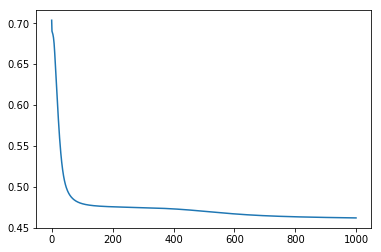

Neural Network Accuracy (In Percentage) = 69.0
epoch 0: err 0.705391
epoch 1: err 0.691824
epoch 2: err 0.691342
epoch 3: err 0.690902
epoch 4: err 0.690478
epoch 5: err 0.690042
epoch 6: err 0.689573
epoch 7: err 0.689044
epoch 8: err 0.688427
epoch 9: err 0.687686
epoch 10: err 0.686775
epoch 11: err 0.685634
epoch 12: err 0.684184
epoch 13: err 0.682319
epoch 14: err 0.679905
epoch 15: err 0.676785
epoch 16: err 0.672812
epoch 17: err 0.667906
epoch 18: err 0.662142
epoch 19: err 0.655782
epoch 20: err 0.649191
epoch 21: err 0.642664
epoch 22: err 0.636327
epoch 23: err 0.630163
epoch 24: err 0.624092
epoch 25: err 0.618037
epoch 26: err 0.611953
epoch 27: err 0.605827
epoch 28: err 0.599668
epoch 29: err 0.593500
epoch 30: err 0.587352
epoch 31: err 0.581255
epoch 32: err 0.575237
epoch 33: err 0.569321
epoch 34: err 0.563525
epoch 35: err 0.557865
epoch 36: err 0.552350
epoch 37: err 0.546989
epoch 38: err 0.541790
epoch 39: err 0.536759
epoch 40: err 0.531902
epoch 41: err 0.5272

epoch 344: err 0.426332
epoch 345: err 0.426305
epoch 346: err 0.426278
epoch 347: err 0.426251
epoch 348: err 0.426224
epoch 349: err 0.426197
epoch 350: err 0.426170
epoch 351: err 0.426143
epoch 352: err 0.426116
epoch 353: err 0.426090
epoch 354: err 0.426063
epoch 355: err 0.426037
epoch 356: err 0.426010
epoch 357: err 0.425984
epoch 358: err 0.425958
epoch 359: err 0.425932
epoch 360: err 0.425906
epoch 361: err 0.425880
epoch 362: err 0.425854
epoch 363: err 0.425829
epoch 364: err 0.425803
epoch 365: err 0.425777
epoch 366: err 0.425752
epoch 367: err 0.425727
epoch 368: err 0.425701
epoch 369: err 0.425676
epoch 370: err 0.425651
epoch 371: err 0.425626
epoch 372: err 0.425601
epoch 373: err 0.425577
epoch 374: err 0.425552
epoch 375: err 0.425527
epoch 376: err 0.425503
epoch 377: err 0.425478
epoch 378: err 0.425454
epoch 379: err 0.425430
epoch 380: err 0.425405
epoch 381: err 0.425381
epoch 382: err 0.425357
epoch 383: err 0.425333
epoch 384: err 0.425310
epoch 385: err 0

epoch 686: err 0.420657
epoch 687: err 0.420647
epoch 688: err 0.420636
epoch 689: err 0.420626
epoch 690: err 0.420615
epoch 691: err 0.420605
epoch 692: err 0.420595
epoch 693: err 0.420584
epoch 694: err 0.420574
epoch 695: err 0.420564
epoch 696: err 0.420554
epoch 697: err 0.420543
epoch 698: err 0.420533
epoch 699: err 0.420523
epoch 700: err 0.420513
epoch 701: err 0.420503
epoch 702: err 0.420492
epoch 703: err 0.420482
epoch 704: err 0.420472
epoch 705: err 0.420462
epoch 706: err 0.420452
epoch 707: err 0.420442
epoch 708: err 0.420432
epoch 709: err 0.420422
epoch 710: err 0.420412
epoch 711: err 0.420402
epoch 712: err 0.420391
epoch 713: err 0.420381
epoch 714: err 0.420372
epoch 715: err 0.420362
epoch 716: err 0.420352
epoch 717: err 0.420342
epoch 718: err 0.420332
epoch 719: err 0.420322
epoch 720: err 0.420312
epoch 721: err 0.420302
epoch 722: err 0.420292
epoch 723: err 0.420282
epoch 724: err 0.420272
epoch 725: err 0.420263
epoch 726: err 0.420253
epoch 727: err 0

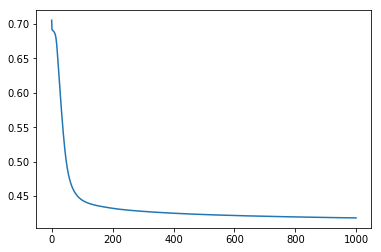

Neural Network Accuracy (In Percentage) = 71.2
epoch 0: err 0.709659
epoch 1: err 0.694211
epoch 2: err 0.692902
epoch 3: err 0.691787
epoch 4: err 0.690745
epoch 5: err 0.689661
epoch 6: err 0.688417
epoch 7: err 0.686874
epoch 8: err 0.684861
epoch 9: err 0.682175
epoch 10: err 0.678608
epoch 11: err 0.674024
epoch 12: err 0.668450
epoch 13: err 0.662105
epoch 14: err 0.655304
epoch 15: err 0.648295
epoch 16: err 0.641188
epoch 17: err 0.633981
epoch 18: err 0.626622
epoch 19: err 0.619063
epoch 20: err 0.611286
epoch 21: err 0.603303
epoch 22: err 0.595157
epoch 23: err 0.586910
epoch 24: err 0.578633
epoch 25: err 0.570398
epoch 26: err 0.562273
epoch 27: err 0.554320
epoch 28: err 0.546591
epoch 29: err 0.539130
epoch 30: err 0.531974
epoch 31: err 0.525152
epoch 32: err 0.518682
epoch 33: err 0.512578
epoch 34: err 0.506844
epoch 35: err 0.501479
epoch 36: err 0.496474
epoch 37: err 0.491819
epoch 38: err 0.487496
epoch 39: err 0.483488
epoch 40: err 0.479774
epoch 41: err 0.4763

epoch 344: err 0.409989
epoch 345: err 0.409962
epoch 346: err 0.409935
epoch 347: err 0.409908
epoch 348: err 0.409881
epoch 349: err 0.409855
epoch 350: err 0.409828
epoch 351: err 0.409802
epoch 352: err 0.409776
epoch 353: err 0.409750
epoch 354: err 0.409724
epoch 355: err 0.409698
epoch 356: err 0.409672
epoch 357: err 0.409646
epoch 358: err 0.409620
epoch 359: err 0.409595
epoch 360: err 0.409569
epoch 361: err 0.409544
epoch 362: err 0.409519
epoch 363: err 0.409493
epoch 364: err 0.409468
epoch 365: err 0.409443
epoch 366: err 0.409418
epoch 367: err 0.409393
epoch 368: err 0.409369
epoch 369: err 0.409344
epoch 370: err 0.409319
epoch 371: err 0.409295
epoch 372: err 0.409270
epoch 373: err 0.409246
epoch 374: err 0.409222
epoch 375: err 0.409198
epoch 376: err 0.409174
epoch 377: err 0.409150
epoch 378: err 0.409126
epoch 379: err 0.409102
epoch 380: err 0.409078
epoch 381: err 0.409054
epoch 382: err 0.409031
epoch 383: err 0.409007
epoch 384: err 0.408984
epoch 385: err 0

epoch 687: err 0.404107
epoch 688: err 0.404095
epoch 689: err 0.404083
epoch 690: err 0.404071
epoch 691: err 0.404059
epoch 692: err 0.404047
epoch 693: err 0.404035
epoch 694: err 0.404023
epoch 695: err 0.404011
epoch 696: err 0.404000
epoch 697: err 0.403988
epoch 698: err 0.403976
epoch 699: err 0.403964
epoch 700: err 0.403952
epoch 701: err 0.403941
epoch 702: err 0.403929
epoch 703: err 0.403917
epoch 704: err 0.403906
epoch 705: err 0.403894
epoch 706: err 0.403882
epoch 707: err 0.403871
epoch 708: err 0.403859
epoch 709: err 0.403847
epoch 710: err 0.403836
epoch 711: err 0.403824
epoch 712: err 0.403813
epoch 713: err 0.403801
epoch 714: err 0.403790
epoch 715: err 0.403778
epoch 716: err 0.403767
epoch 717: err 0.403755
epoch 718: err 0.403744
epoch 719: err 0.403732
epoch 720: err 0.403721
epoch 721: err 0.403709
epoch 722: err 0.403698
epoch 723: err 0.403686
epoch 724: err 0.403675
epoch 725: err 0.403664
epoch 726: err 0.403652
epoch 727: err 0.403641
epoch 728: err 0

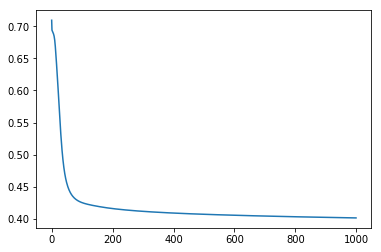

Neural Network Accuracy (In Percentage) = 72.39999999999999
epoch 0: err 0.697015
epoch 1: err 0.693330
epoch 2: err 0.692557
epoch 3: err 0.691872
epoch 4: err 0.691225
epoch 5: err 0.690568
epoch 6: err 0.689859
epoch 7: err 0.689047
epoch 8: err 0.688071
epoch 9: err 0.686850
epoch 10: err 0.685272
epoch 11: err 0.683186
epoch 12: err 0.680403
epoch 13: err 0.676717
epoch 14: err 0.671989
epoch 15: err 0.666257
epoch 16: err 0.659787
epoch 17: err 0.652932
epoch 18: err 0.645928
epoch 19: err 0.638810
epoch 20: err 0.631488
epoch 21: err 0.623847
epoch 22: err 0.615794
epoch 23: err 0.607275
epoch 24: err 0.598286
epoch 25: err 0.588874
epoch 26: err 0.579143
epoch 27: err 0.569240
epoch 28: err 0.559325
epoch 29: err 0.549539
epoch 30: err 0.539994
epoch 31: err 0.530769
epoch 32: err 0.521917
epoch 33: err 0.513475
epoch 34: err 0.505466
epoch 35: err 0.497903
epoch 36: err 0.490789
epoch 37: err 0.484117
epoch 38: err 0.477877
epoch 39: err 0.472052
epoch 40: err 0.466625
epoch 4

epoch 344: err 0.373148
epoch 345: err 0.373129
epoch 346: err 0.373109
epoch 347: err 0.373089
epoch 348: err 0.373070
epoch 349: err 0.373050
epoch 350: err 0.373031
epoch 351: err 0.373011
epoch 352: err 0.372992
epoch 353: err 0.372973
epoch 354: err 0.372953
epoch 355: err 0.372934
epoch 356: err 0.372915
epoch 357: err 0.372896
epoch 358: err 0.372877
epoch 359: err 0.372858
epoch 360: err 0.372840
epoch 361: err 0.372821
epoch 362: err 0.372802
epoch 363: err 0.372783
epoch 364: err 0.372765
epoch 365: err 0.372746
epoch 366: err 0.372728
epoch 367: err 0.372709
epoch 368: err 0.372691
epoch 369: err 0.372673
epoch 370: err 0.372654
epoch 371: err 0.372636
epoch 372: err 0.372618
epoch 373: err 0.372600
epoch 374: err 0.372582
epoch 375: err 0.372564
epoch 376: err 0.372546
epoch 377: err 0.372528
epoch 378: err 0.372510
epoch 379: err 0.372492
epoch 380: err 0.372474
epoch 381: err 0.372456
epoch 382: err 0.372438
epoch 383: err 0.372421
epoch 384: err 0.372403
epoch 385: err 0

epoch 686: err 0.366189
epoch 687: err 0.366176
epoch 688: err 0.366162
epoch 689: err 0.366149
epoch 690: err 0.366136
epoch 691: err 0.366123
epoch 692: err 0.366110
epoch 693: err 0.366097
epoch 694: err 0.366084
epoch 695: err 0.366070
epoch 696: err 0.366057
epoch 697: err 0.366044
epoch 698: err 0.366031
epoch 699: err 0.366018
epoch 700: err 0.366006
epoch 701: err 0.365993
epoch 702: err 0.365980
epoch 703: err 0.365967
epoch 704: err 0.365954
epoch 705: err 0.365941
epoch 706: err 0.365929
epoch 707: err 0.365916
epoch 708: err 0.365903
epoch 709: err 0.365890
epoch 710: err 0.365878
epoch 711: err 0.365865
epoch 712: err 0.365852
epoch 713: err 0.365840
epoch 714: err 0.365827
epoch 715: err 0.365815
epoch 716: err 0.365802
epoch 717: err 0.365790
epoch 718: err 0.365777
epoch 719: err 0.365765
epoch 720: err 0.365752
epoch 721: err 0.365740
epoch 722: err 0.365727
epoch 723: err 0.365715
epoch 724: err 0.365702
epoch 725: err 0.365690
epoch 726: err 0.365678
epoch 727: err 0

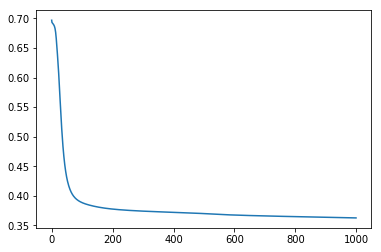

Neural Network Accuracy (In Percentage) = 72.0
epoch 0: err 0.701352
epoch 1: err 0.690170
epoch 2: err 0.689096
epoch 3: err 0.687995
epoch 4: err 0.686796
epoch 5: err 0.685417
epoch 6: err 0.683748
epoch 7: err 0.681633
epoch 8: err 0.678848
epoch 9: err 0.675084
epoch 10: err 0.669970
epoch 11: err 0.663209
epoch 12: err 0.654835
epoch 13: err 0.645353
epoch 14: err 0.635488
epoch 15: err 0.625745
epoch 16: err 0.616245
epoch 17: err 0.606868
epoch 18: err 0.597451
epoch 19: err 0.587887
epoch 20: err 0.578149
epoch 21: err 0.568280
epoch 22: err 0.558356
epoch 23: err 0.548468
epoch 24: err 0.538697
epoch 25: err 0.529113
epoch 26: err 0.519771
epoch 27: err 0.510717
epoch 28: err 0.501988
epoch 29: err 0.493613
epoch 30: err 0.485617
epoch 31: err 0.478016
epoch 32: err 0.470820
epoch 33: err 0.464032
epoch 34: err 0.457650
epoch 35: err 0.451665
epoch 36: err 0.446065
epoch 37: err 0.440834
epoch 38: err 0.435953
epoch 39: err 0.431403
epoch 40: err 0.427163
epoch 41: err 0.4232

epoch 345: err 0.342338
epoch 346: err 0.342275
epoch 347: err 0.342213
epoch 348: err 0.342150
epoch 349: err 0.342088
epoch 350: err 0.342025
epoch 351: err 0.341963
epoch 352: err 0.341900
epoch 353: err 0.341838
epoch 354: err 0.341776
epoch 355: err 0.341713
epoch 356: err 0.341651
epoch 357: err 0.341588
epoch 358: err 0.341526
epoch 359: err 0.341463
epoch 360: err 0.341401
epoch 361: err 0.341339
epoch 362: err 0.341276
epoch 363: err 0.341214
epoch 364: err 0.341151
epoch 365: err 0.341089
epoch 366: err 0.341026
epoch 367: err 0.340964
epoch 368: err 0.340901
epoch 369: err 0.340839
epoch 370: err 0.340776
epoch 371: err 0.340714
epoch 372: err 0.340651
epoch 373: err 0.340589
epoch 374: err 0.340526
epoch 375: err 0.340464
epoch 376: err 0.340401
epoch 377: err 0.340339
epoch 378: err 0.340277
epoch 379: err 0.340214
epoch 380: err 0.340152
epoch 381: err 0.340090
epoch 382: err 0.340028
epoch 383: err 0.339965
epoch 384: err 0.339903
epoch 385: err 0.339841
epoch 386: err 0

epoch 688: err 0.328850
epoch 689: err 0.328835
epoch 690: err 0.328820
epoch 691: err 0.328805
epoch 692: err 0.328791
epoch 693: err 0.328776
epoch 694: err 0.328761
epoch 695: err 0.328747
epoch 696: err 0.328732
epoch 697: err 0.328718
epoch 698: err 0.328703
epoch 699: err 0.328689
epoch 700: err 0.328675
epoch 701: err 0.328660
epoch 702: err 0.328646
epoch 703: err 0.328632
epoch 704: err 0.328618
epoch 705: err 0.328604
epoch 706: err 0.328590
epoch 707: err 0.328577
epoch 708: err 0.328563
epoch 709: err 0.328549
epoch 710: err 0.328536
epoch 711: err 0.328522
epoch 712: err 0.328508
epoch 713: err 0.328495
epoch 714: err 0.328481
epoch 715: err 0.328468
epoch 716: err 0.328455
epoch 717: err 0.328442
epoch 718: err 0.328428
epoch 719: err 0.328415
epoch 720: err 0.328402
epoch 721: err 0.328389
epoch 722: err 0.328376
epoch 723: err 0.328363
epoch 724: err 0.328350
epoch 725: err 0.328337
epoch 726: err 0.328324
epoch 727: err 0.328312
epoch 728: err 0.328299
epoch 729: err 0

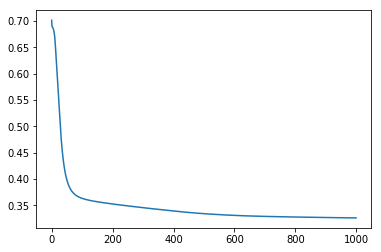

Neural Network Accuracy (In Percentage) = 72.8
epoch 0: err 0.713845
epoch 1: err 0.691733
epoch 2: err 0.691059
epoch 3: err 0.690350
epoch 4: err 0.689551
epoch 5: err 0.688589
epoch 6: err 0.687359
epoch 7: err 0.685705
epoch 8: err 0.683377
epoch 9: err 0.679998
epoch 10: err 0.675048
epoch 11: err 0.668010
epoch 12: err 0.658762
epoch 13: err 0.647903
epoch 14: err 0.636375
epoch 15: err 0.624803
epoch 16: err 0.613382
epoch 17: err 0.602109
epoch 18: err 0.590948
epoch 19: err 0.579876
epoch 20: err 0.568883
epoch 21: err 0.557971
epoch 22: err 0.547145
epoch 23: err 0.536413
epoch 24: err 0.525791
epoch 25: err 0.515299
epoch 26: err 0.504965
epoch 27: err 0.494821
epoch 28: err 0.484902
epoch 29: err 0.475242
epoch 30: err 0.465874
epoch 31: err 0.456825
epoch 32: err 0.448116
epoch 33: err 0.439766
epoch 34: err 0.431785
epoch 35: err 0.424180
epoch 36: err 0.416954
epoch 37: err 0.410104
epoch 38: err 0.403626
epoch 39: err 0.397511
epoch 40: err 0.391747
epoch 41: err 0.3863

epoch 344: err 0.255867
epoch 345: err 0.255800
epoch 346: err 0.255734
epoch 347: err 0.255668
epoch 348: err 0.255603
epoch 349: err 0.255538
epoch 350: err 0.255474
epoch 351: err 0.255410
epoch 352: err 0.255347
epoch 353: err 0.255285
epoch 354: err 0.255222
epoch 355: err 0.255161
epoch 356: err 0.255100
epoch 357: err 0.255039
epoch 358: err 0.254979
epoch 359: err 0.254919
epoch 360: err 0.254859
epoch 361: err 0.254801
epoch 362: err 0.254742
epoch 363: err 0.254684
epoch 364: err 0.254627
epoch 365: err 0.254570
epoch 366: err 0.254513
epoch 367: err 0.254457
epoch 368: err 0.254401
epoch 369: err 0.254346
epoch 370: err 0.254291
epoch 371: err 0.254236
epoch 372: err 0.254182
epoch 373: err 0.254128
epoch 374: err 0.254075
epoch 375: err 0.254022
epoch 376: err 0.253970
epoch 377: err 0.253918
epoch 378: err 0.253866
epoch 379: err 0.253815
epoch 380: err 0.253764
epoch 381: err 0.253713
epoch 382: err 0.253663
epoch 383: err 0.253613
epoch 384: err 0.253564
epoch 385: err 0

epoch 687: err 0.246850
epoch 688: err 0.246840
epoch 689: err 0.246829
epoch 690: err 0.246819
epoch 691: err 0.246808
epoch 692: err 0.246798
epoch 693: err 0.246788
epoch 694: err 0.246778
epoch 695: err 0.246767
epoch 696: err 0.246757
epoch 697: err 0.246747
epoch 698: err 0.246737
epoch 699: err 0.246727
epoch 700: err 0.246717
epoch 701: err 0.246707
epoch 702: err 0.246697
epoch 703: err 0.246687
epoch 704: err 0.246677
epoch 705: err 0.246667
epoch 706: err 0.246657
epoch 707: err 0.246647
epoch 708: err 0.246637
epoch 709: err 0.246627
epoch 710: err 0.246617
epoch 711: err 0.246607
epoch 712: err 0.246598
epoch 713: err 0.246588
epoch 714: err 0.246578
epoch 715: err 0.246569
epoch 716: err 0.246559
epoch 717: err 0.246549
epoch 718: err 0.246540
epoch 719: err 0.246530
epoch 720: err 0.246520
epoch 721: err 0.246511
epoch 722: err 0.246501
epoch 723: err 0.246492
epoch 724: err 0.246482
epoch 725: err 0.246473
epoch 726: err 0.246463
epoch 727: err 0.246454
epoch 728: err 0

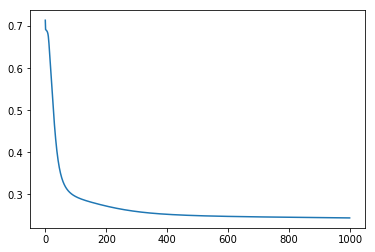

Neural Network Accuracy (In Percentage) = 73.8
epoch 0: err 0.703090
epoch 1: err 0.691348
epoch 2: err 0.691300
epoch 3: err 0.691250
epoch 4: err 0.691198
epoch 5: err 0.691144
epoch 6: err 0.691087
epoch 7: err 0.691026
epoch 8: err 0.690961
epoch 9: err 0.690891
epoch 10: err 0.690814
epoch 11: err 0.690731
epoch 12: err 0.690639
epoch 13: err 0.690537
epoch 14: err 0.690425
epoch 15: err 0.690300
epoch 16: err 0.690159
epoch 17: err 0.690001
epoch 18: err 0.689822
epoch 19: err 0.689619
epoch 20: err 0.689387
epoch 21: err 0.689119
epoch 22: err 0.688810
epoch 23: err 0.688450
epoch 24: err 0.688026
epoch 25: err 0.687525
epoch 26: err 0.686926
epoch 27: err 0.686202
epoch 28: err 0.685316
epoch 29: err 0.684219
epoch 30: err 0.682840
epoch 31: err 0.681081
epoch 32: err 0.678802
epoch 33: err 0.675811
epoch 34: err 0.671854
epoch 35: err 0.666624
epoch 36: err 0.659812
epoch 37: err 0.651204
epoch 38: err 0.640770
epoch 39: err 0.628659
epoch 40: err 0.615089
epoch 41: err 0.6002

epoch 345: err 0.083660
epoch 346: err 0.083554
epoch 347: err 0.083448
epoch 348: err 0.083342
epoch 349: err 0.083237
epoch 350: err 0.083132
epoch 351: err 0.083027
epoch 352: err 0.082923
epoch 353: err 0.082819
epoch 354: err 0.082716
epoch 355: err 0.082613
epoch 356: err 0.082510
epoch 357: err 0.082408
epoch 358: err 0.082306
epoch 359: err 0.082205
epoch 360: err 0.082104
epoch 361: err 0.082003
epoch 362: err 0.081903
epoch 363: err 0.081803
epoch 364: err 0.081704
epoch 365: err 0.081605
epoch 366: err 0.081506
epoch 367: err 0.081408
epoch 368: err 0.081310
epoch 369: err 0.081213
epoch 370: err 0.081116
epoch 371: err 0.081020
epoch 372: err 0.080924
epoch 373: err 0.080829
epoch 374: err 0.080734
epoch 375: err 0.080639
epoch 376: err 0.080545
epoch 377: err 0.080452
epoch 378: err 0.080359
epoch 379: err 0.080266
epoch 380: err 0.080174
epoch 381: err 0.080083
epoch 382: err 0.079992
epoch 383: err 0.079901
epoch 384: err 0.079811
epoch 385: err 0.079721
epoch 386: err 0

epoch 688: err 0.066830
epoch 689: err 0.066806
epoch 690: err 0.066782
epoch 691: err 0.066758
epoch 692: err 0.066735
epoch 693: err 0.066711
epoch 694: err 0.066688
epoch 695: err 0.066664
epoch 696: err 0.066641
epoch 697: err 0.066617
epoch 698: err 0.066594
epoch 699: err 0.066571
epoch 700: err 0.066548
epoch 701: err 0.066525
epoch 702: err 0.066502
epoch 703: err 0.066479
epoch 704: err 0.066456
epoch 705: err 0.066433
epoch 706: err 0.066410
epoch 707: err 0.066387
epoch 708: err 0.066365
epoch 709: err 0.066342
epoch 710: err 0.066319
epoch 711: err 0.066297
epoch 712: err 0.066274
epoch 713: err 0.066252
epoch 714: err 0.066230
epoch 715: err 0.066207
epoch 716: err 0.066185
epoch 717: err 0.066163
epoch 718: err 0.066141
epoch 719: err 0.066119
epoch 720: err 0.066097
epoch 721: err 0.066075
epoch 722: err 0.066053
epoch 723: err 0.066031
epoch 724: err 0.066009
epoch 725: err 0.065988
epoch 726: err 0.065966
epoch 727: err 0.065944
epoch 728: err 0.065923
epoch 729: err 0

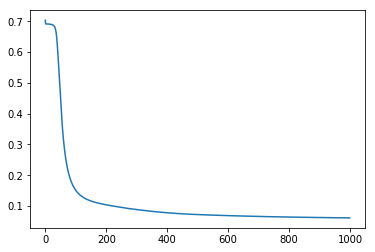

Neural Network Accuracy (In Percentage) = 73.8
epoch 0: err 0.693878
epoch 1: err 0.691797
epoch 2: err 0.691748
epoch 3: err 0.691702
epoch 4: err 0.691658
epoch 5: err 0.691614
epoch 6: err 0.691572
epoch 7: err 0.691530
epoch 8: err 0.691488
epoch 9: err 0.691445
epoch 10: err 0.691401
epoch 11: err 0.691355
epoch 12: err 0.691306
epoch 13: err 0.691254
epoch 14: err 0.691198
epoch 15: err 0.691138
epoch 16: err 0.691071
epoch 17: err 0.690997
epoch 18: err 0.690915
epoch 19: err 0.690822
epoch 20: err 0.690717
epoch 21: err 0.690598
epoch 22: err 0.690460
epoch 23: err 0.690300
epoch 24: err 0.690112
epoch 25: err 0.689891
epoch 26: err 0.689629
epoch 27: err 0.689312
epoch 28: err 0.688927
epoch 29: err 0.688453
epoch 30: err 0.687861
epoch 31: err 0.687110
epoch 32: err 0.686141
epoch 33: err 0.684871
epoch 34: err 0.683180
epoch 35: err 0.680899
epoch 36: err 0.677802
epoch 37: err 0.673621
epoch 38: err 0.668086
epoch 39: err 0.661016
epoch 40: err 0.652413
epoch 41: err 0.6424

epoch 345: err 0.056868
epoch 346: err 0.056814
epoch 347: err 0.056761
epoch 348: err 0.056707
epoch 349: err 0.056654
epoch 350: err 0.056601
epoch 351: err 0.056549
epoch 352: err 0.056496
epoch 353: err 0.056444
epoch 354: err 0.056392
epoch 355: err 0.056340
epoch 356: err 0.056289
epoch 357: err 0.056237
epoch 358: err 0.056186
epoch 359: err 0.056135
epoch 360: err 0.056084
epoch 361: err 0.056033
epoch 362: err 0.055983
epoch 363: err 0.055932
epoch 364: err 0.055882
epoch 365: err 0.055832
epoch 366: err 0.055782
epoch 367: err 0.055732
epoch 368: err 0.055683
epoch 369: err 0.055633
epoch 370: err 0.055584
epoch 371: err 0.055535
epoch 372: err 0.055486
epoch 373: err 0.055437
epoch 374: err 0.055388
epoch 375: err 0.055340
epoch 376: err 0.055291
epoch 377: err 0.055243
epoch 378: err 0.055195
epoch 379: err 0.055146
epoch 380: err 0.055099
epoch 381: err 0.055051
epoch 382: err 0.055003
epoch 383: err 0.054955
epoch 384: err 0.054908
epoch 385: err 0.054861
epoch 386: err 0

epoch 687: err 0.045136
epoch 688: err 0.045113
epoch 689: err 0.045089
epoch 690: err 0.045066
epoch 691: err 0.045042
epoch 692: err 0.045019
epoch 693: err 0.044996
epoch 694: err 0.044972
epoch 695: err 0.044948
epoch 696: err 0.044925
epoch 697: err 0.044901
epoch 698: err 0.044877
epoch 699: err 0.044853
epoch 700: err 0.044829
epoch 701: err 0.044805
epoch 702: err 0.044781
epoch 703: err 0.044757
epoch 704: err 0.044732
epoch 705: err 0.044708
epoch 706: err 0.044684
epoch 707: err 0.044659
epoch 708: err 0.044634
epoch 709: err 0.044610
epoch 710: err 0.044585
epoch 711: err 0.044560
epoch 712: err 0.044535
epoch 713: err 0.044510
epoch 714: err 0.044485
epoch 715: err 0.044460
epoch 716: err 0.044434
epoch 717: err 0.044409
epoch 718: err 0.044383
epoch 719: err 0.044358
epoch 720: err 0.044332
epoch 721: err 0.044306
epoch 722: err 0.044280
epoch 723: err 0.044254
epoch 724: err 0.044228
epoch 725: err 0.044202
epoch 726: err 0.044175
epoch 727: err 0.044149
epoch 728: err 0

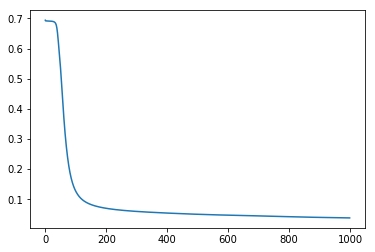

Neural Network Accuracy (In Percentage) = 75.4
epoch 0: err 0.691867
epoch 1: err 0.691640
epoch 2: err 0.691618
epoch 3: err 0.691595
epoch 4: err 0.691572
epoch 5: err 0.691548
epoch 6: err 0.691524
epoch 7: err 0.691499
epoch 8: err 0.691472
epoch 9: err 0.691444
epoch 10: err 0.691414
epoch 11: err 0.691382
epoch 12: err 0.691347
epoch 13: err 0.691309
epoch 14: err 0.691268
epoch 15: err 0.691223
epoch 16: err 0.691173
epoch 17: err 0.691118
epoch 18: err 0.691057
epoch 19: err 0.690988
epoch 20: err 0.690911
epoch 21: err 0.690825
epoch 22: err 0.690727
epoch 23: err 0.690616
epoch 24: err 0.690489
epoch 25: err 0.690343
epoch 26: err 0.690174
epoch 27: err 0.689978
epoch 28: err 0.689749
epoch 29: err 0.689478
epoch 30: err 0.689156
epoch 31: err 0.688768
epoch 32: err 0.688298
epoch 33: err 0.687720
epoch 34: err 0.687002
epoch 35: err 0.686099
epoch 36: err 0.684949
epoch 37: err 0.683466
epoch 38: err 0.681538
epoch 39: err 0.679027
epoch 40: err 0.675788
epoch 41: err 0.6717

epoch 344: err 0.026649
epoch 345: err 0.026605
epoch 346: err 0.026561
epoch 347: err 0.026518
epoch 348: err 0.026475
epoch 349: err 0.026433
epoch 350: err 0.026390
epoch 351: err 0.026348
epoch 352: err 0.026306
epoch 353: err 0.026265
epoch 354: err 0.026224
epoch 355: err 0.026183
epoch 356: err 0.026142
epoch 357: err 0.026102
epoch 358: err 0.026062
epoch 359: err 0.026022
epoch 360: err 0.025983
epoch 361: err 0.025943
epoch 362: err 0.025904
epoch 363: err 0.025866
epoch 364: err 0.025827
epoch 365: err 0.025789
epoch 366: err 0.025751
epoch 367: err 0.025713
epoch 368: err 0.025676
epoch 369: err 0.025639
epoch 370: err 0.025602
epoch 371: err 0.025565
epoch 372: err 0.025528
epoch 373: err 0.025492
epoch 374: err 0.025456
epoch 375: err 0.025420
epoch 376: err 0.025384
epoch 377: err 0.025349
epoch 378: err 0.025314
epoch 379: err 0.025279
epoch 380: err 0.025244
epoch 381: err 0.025210
epoch 382: err 0.025175
epoch 383: err 0.025141
epoch 384: err 0.025107
epoch 385: err 0

epoch 686: err 0.018575
epoch 687: err 0.018557
epoch 688: err 0.018538
epoch 689: err 0.018519
epoch 690: err 0.018500
epoch 691: err 0.018481
epoch 692: err 0.018462
epoch 693: err 0.018443
epoch 694: err 0.018424
epoch 695: err 0.018405
epoch 696: err 0.018386
epoch 697: err 0.018367
epoch 698: err 0.018349
epoch 699: err 0.018330
epoch 700: err 0.018311
epoch 701: err 0.018292
epoch 702: err 0.018273
epoch 703: err 0.018254
epoch 704: err 0.018235
epoch 705: err 0.018217
epoch 706: err 0.018198
epoch 707: err 0.018179
epoch 708: err 0.018160
epoch 709: err 0.018141
epoch 710: err 0.018122
epoch 711: err 0.018104
epoch 712: err 0.018085
epoch 713: err 0.018066
epoch 714: err 0.018047
epoch 715: err 0.018028
epoch 716: err 0.018009
epoch 717: err 0.017991
epoch 718: err 0.017972
epoch 719: err 0.017953
epoch 720: err 0.017934
epoch 721: err 0.017916
epoch 722: err 0.017897
epoch 723: err 0.017878
epoch 724: err 0.017859
epoch 725: err 0.017841
epoch 726: err 0.017822
epoch 727: err 0

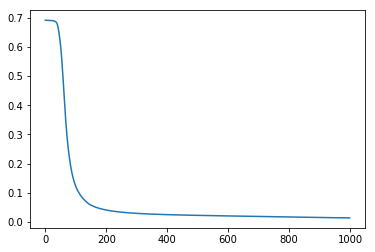

Neural Network Accuracy (In Percentage) = 73.6
epoch 0: err 0.693138
epoch 1: err 0.692161
epoch 2: err 0.691900
epoch 3: err 0.691638
epoch 4: err 0.691369
epoch 5: err 0.691086
epoch 6: err 0.690779
epoch 7: err 0.690439
epoch 8: err 0.690051
epoch 9: err 0.689596
epoch 10: err 0.689048
epoch 11: err 0.688368
epoch 12: err 0.687494
epoch 13: err 0.686332
epoch 14: err 0.684721
epoch 15: err 0.682385
epoch 16: err 0.678821
epoch 17: err 0.673095
epoch 18: err 0.663523
epoch 19: err 0.647744
epoch 20: err 0.625109
epoch 21: err 0.599854
epoch 22: err 0.577027
epoch 23: err 0.557605
epoch 24: err 0.540057
epoch 25: err 0.522992
epoch 26: err 0.505722
epoch 27: err 0.487999
epoch 28: err 0.469777
epoch 29: err 0.451114
epoch 30: err 0.432130
epoch 31: err 0.412986
epoch 32: err 0.393863
epoch 33: err 0.374941
epoch 34: err 0.356392
epoch 35: err 0.338368
epoch 36: err 0.320978
epoch 37: err 0.304289
epoch 38: err 0.288338
epoch 39: err 0.273150
epoch 40: err 0.258741
epoch 41: err 0.2451

epoch 345: err 0.004102
epoch 346: err 0.004089
epoch 347: err 0.004075
epoch 348: err 0.004062
epoch 349: err 0.004049
epoch 350: err 0.004036
epoch 351: err 0.004023
epoch 352: err 0.004010
epoch 353: err 0.003997
epoch 354: err 0.003984
epoch 355: err 0.003971
epoch 356: err 0.003959
epoch 357: err 0.003946
epoch 358: err 0.003934
epoch 359: err 0.003921
epoch 360: err 0.003909
epoch 361: err 0.003897
epoch 362: err 0.003884
epoch 363: err 0.003872
epoch 364: err 0.003860
epoch 365: err 0.003848
epoch 366: err 0.003836
epoch 367: err 0.003825
epoch 368: err 0.003813
epoch 369: err 0.003801
epoch 370: err 0.003790
epoch 371: err 0.003778
epoch 372: err 0.003767
epoch 373: err 0.003755
epoch 374: err 0.003744
epoch 375: err 0.003733
epoch 376: err 0.003722
epoch 377: err 0.003710
epoch 378: err 0.003699
epoch 379: err 0.003688
epoch 380: err 0.003677
epoch 381: err 0.003667
epoch 382: err 0.003656
epoch 383: err 0.003645
epoch 384: err 0.003634
epoch 385: err 0.003624
epoch 386: err 0

epoch 688: err 0.001881
epoch 689: err 0.001878
epoch 690: err 0.001875
epoch 691: err 0.001872
epoch 692: err 0.001868
epoch 693: err 0.001865
epoch 694: err 0.001862
epoch 695: err 0.001859
epoch 696: err 0.001856
epoch 697: err 0.001853
epoch 698: err 0.001850
epoch 699: err 0.001847
epoch 700: err 0.001844
epoch 701: err 0.001841
epoch 702: err 0.001838
epoch 703: err 0.001835
epoch 704: err 0.001832
epoch 705: err 0.001829
epoch 706: err 0.001826
epoch 707: err 0.001823
epoch 708: err 0.001820
epoch 709: err 0.001817
epoch 710: err 0.001814
epoch 711: err 0.001811
epoch 712: err 0.001808
epoch 713: err 0.001805
epoch 714: err 0.001802
epoch 715: err 0.001799
epoch 716: err 0.001797
epoch 717: err 0.001794
epoch 718: err 0.001791
epoch 719: err 0.001788
epoch 720: err 0.001785
epoch 721: err 0.001782
epoch 722: err 0.001779
epoch 723: err 0.001776
epoch 724: err 0.001774
epoch 725: err 0.001771
epoch 726: err 0.001768
epoch 727: err 0.001765
epoch 728: err 0.001762
epoch 729: err 0

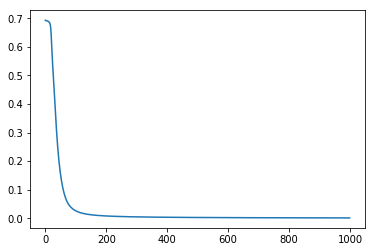

Neural Network Accuracy (In Percentage) = 77.60000000000001
epoch 0: err 0.710582
epoch 1: err 0.691535
epoch 2: err 0.691339
epoch 3: err 0.691152
epoch 4: err 0.690971
epoch 5: err 0.690793
epoch 6: err 0.690615
epoch 7: err 0.690436
epoch 8: err 0.690252
epoch 9: err 0.690062
epoch 10: err 0.689863
epoch 11: err 0.689652
epoch 12: err 0.689427
epoch 13: err 0.689183
epoch 14: err 0.688917
epoch 15: err 0.688623
epoch 16: err 0.688295
epoch 17: err 0.687925
epoch 18: err 0.687503
epoch 19: err 0.687014
epoch 20: err 0.686438
epoch 21: err 0.685750
epoch 22: err 0.684908
epoch 23: err 0.683853
epoch 24: err 0.682492
epoch 25: err 0.680672
epoch 26: err 0.678133
epoch 27: err 0.674409
epoch 28: err 0.668659
epoch 29: err 0.659459
epoch 30: err 0.645202
epoch 31: err 0.626438
epoch 32: err 0.607644
epoch 33: err 0.592405
epoch 34: err 0.579815
epoch 35: err 0.568035
epoch 36: err 0.556146
epoch 37: err 0.543841
epoch 38: err 0.531046
epoch 39: err 0.517766
epoch 40: err 0.504035
epoch 4

epoch 344: err 0.009677
epoch 345: err 0.009653
epoch 346: err 0.009627
epoch 347: err 0.009600
epoch 348: err 0.009570
epoch 349: err 0.009538
epoch 350: err 0.009502
epoch 351: err 0.009462
epoch 352: err 0.009416
epoch 353: err 0.009361
epoch 354: err 0.009294
epoch 355: err 0.009210
epoch 356: err 0.009098
epoch 357: err 0.008942
epoch 358: err 0.008706
epoch 359: err 0.008317
epoch 360: err 0.007598
epoch 361: err 0.006148
epoch 362: err 0.004674
epoch 363: err 0.004587
epoch 364: err 0.004529
epoch 365: err 0.004482
epoch 366: err 0.004441
epoch 367: err 0.004404
epoch 368: err 0.004369
epoch 369: err 0.004338
epoch 370: err 0.004308
epoch 371: err 0.004280
epoch 372: err 0.004253
epoch 373: err 0.004227
epoch 374: err 0.004202
epoch 375: err 0.004178
epoch 376: err 0.004155
epoch 377: err 0.004133
epoch 378: err 0.004111
epoch 379: err 0.004090
epoch 380: err 0.004070
epoch 381: err 0.004050
epoch 382: err 0.004030
epoch 383: err 0.004011
epoch 384: err 0.003993
epoch 385: err 0

epoch 686: err 0.001916
epoch 687: err 0.001912
epoch 688: err 0.001909
epoch 689: err 0.001906
epoch 690: err 0.001902
epoch 691: err 0.001899
epoch 692: err 0.001896
epoch 693: err 0.001892
epoch 694: err 0.001889
epoch 695: err 0.001886
epoch 696: err 0.001883
epoch 697: err 0.001879
epoch 698: err 0.001876
epoch 699: err 0.001873
epoch 700: err 0.001870
epoch 701: err 0.001867
epoch 702: err 0.001863
epoch 703: err 0.001860
epoch 704: err 0.001857
epoch 705: err 0.001854
epoch 706: err 0.001851
epoch 707: err 0.001848
epoch 708: err 0.001845
epoch 709: err 0.001841
epoch 710: err 0.001838
epoch 711: err 0.001835
epoch 712: err 0.001832
epoch 713: err 0.001829
epoch 714: err 0.001826
epoch 715: err 0.001823
epoch 716: err 0.001820
epoch 717: err 0.001817
epoch 718: err 0.001814
epoch 719: err 0.001811
epoch 720: err 0.001808
epoch 721: err 0.001805
epoch 722: err 0.001802
epoch 723: err 0.001799
epoch 724: err 0.001796
epoch 725: err 0.001793
epoch 726: err 0.001790
epoch 727: err 0

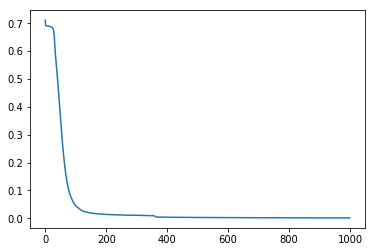

Neural Network Accuracy (In Percentage) = 78.2
epoch 0: err 0.696017
epoch 1: err 0.691897
epoch 2: err 0.691781
epoch 3: err 0.691669
epoch 4: err 0.691560
epoch 5: err 0.691451
epoch 6: err 0.691341
epoch 7: err 0.691229
epoch 8: err 0.691113
epoch 9: err 0.690991
epoch 10: err 0.690862
epoch 11: err 0.690723
epoch 12: err 0.690571
epoch 13: err 0.690404
epoch 14: err 0.690217
epoch 15: err 0.690006
epoch 16: err 0.689765
epoch 17: err 0.689485
epoch 18: err 0.689156
epoch 19: err 0.688764
epoch 20: err 0.688288
epoch 21: err 0.687702
epoch 22: err 0.686966
epoch 23: err 0.686021
epoch 24: err 0.684779
epoch 25: err 0.683106
epoch 26: err 0.680789
epoch 27: err 0.677495
epoch 28: err 0.672725
epoch 29: err 0.665825
epoch 30: err 0.656264
epoch 31: err 0.644450
epoch 32: err 0.632349
epoch 33: err 0.621834
epoch 34: err 0.612768
epoch 35: err 0.604153
epoch 36: err 0.595316
epoch 37: err 0.585963
epoch 38: err 0.576006
epoch 39: err 0.565447
epoch 40: err 0.554331
epoch 41: err 0.5427

epoch 344: err 0.008448
epoch 345: err 0.008058
epoch 346: err 0.007339
epoch 347: err 0.005919
epoch 348: err 0.004654
epoch 349: err 0.004568
epoch 350: err 0.004510
epoch 351: err 0.004462
epoch 352: err 0.004421
epoch 353: err 0.004383
epoch 354: err 0.004349
epoch 355: err 0.004316
epoch 356: err 0.004286
epoch 357: err 0.004257
epoch 358: err 0.004229
epoch 359: err 0.004203
epoch 360: err 0.004178
epoch 361: err 0.004153
epoch 362: err 0.004130
epoch 363: err 0.004107
epoch 364: err 0.004085
epoch 365: err 0.004063
epoch 366: err 0.004042
epoch 367: err 0.004021
epoch 368: err 0.004001
epoch 369: err 0.003982
epoch 370: err 0.003963
epoch 371: err 0.003944
epoch 372: err 0.003925
epoch 373: err 0.003907
epoch 374: err 0.003890
epoch 375: err 0.003872
epoch 376: err 0.003855
epoch 377: err 0.003838
epoch 378: err 0.003822
epoch 379: err 0.003805
epoch 380: err 0.003789
epoch 381: err 0.003773
epoch 382: err 0.003758
epoch 383: err 0.003742
epoch 384: err 0.003727
epoch 385: err 0

epoch 686: err 0.001789
epoch 687: err 0.001785
epoch 688: err 0.001782
epoch 689: err 0.001779
epoch 690: err 0.001776
epoch 691: err 0.001773
epoch 692: err 0.001770
epoch 693: err 0.001767
epoch 694: err 0.001764
epoch 695: err 0.001760
epoch 696: err 0.001757
epoch 697: err 0.001754
epoch 698: err 0.001751
epoch 699: err 0.001748
epoch 700: err 0.001745
epoch 701: err 0.001742
epoch 702: err 0.001739
epoch 703: err 0.001736
epoch 704: err 0.001733
epoch 705: err 0.001730
epoch 706: err 0.001727
epoch 707: err 0.001724
epoch 708: err 0.001721
epoch 709: err 0.001718
epoch 710: err 0.001715
epoch 711: err 0.001712
epoch 712: err 0.001709
epoch 713: err 0.001706
epoch 714: err 0.001703
epoch 715: err 0.001700
epoch 716: err 0.001698
epoch 717: err 0.001695
epoch 718: err 0.001692
epoch 719: err 0.001689
epoch 720: err 0.001686
epoch 721: err 0.001683
epoch 722: err 0.001680
epoch 723: err 0.001678
epoch 724: err 0.001675
epoch 725: err 0.001672
epoch 726: err 0.001669
epoch 727: err 0

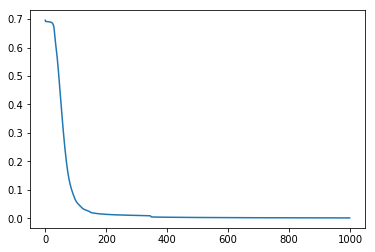

Neural Network Accuracy (In Percentage) = 75.6
epoch 0: err 0.714379
epoch 1: err 0.691547
epoch 2: err 0.691546
epoch 3: err 0.691544
epoch 4: err 0.691543
epoch 5: err 0.691541
epoch 6: err 0.691540
epoch 7: err 0.691538
epoch 8: err 0.691537
epoch 9: err 0.691535
epoch 10: err 0.691533
epoch 11: err 0.691532
epoch 12: err 0.691530
epoch 13: err 0.691528
epoch 14: err 0.691526
epoch 15: err 0.691524
epoch 16: err 0.691522
epoch 17: err 0.691519
epoch 18: err 0.691517
epoch 19: err 0.691515
epoch 20: err 0.691512
epoch 21: err 0.691510
epoch 22: err 0.691507
epoch 23: err 0.691504
epoch 24: err 0.691501
epoch 25: err 0.691498
epoch 26: err 0.691495
epoch 27: err 0.691492
epoch 28: err 0.691488
epoch 29: err 0.691485
epoch 30: err 0.691481
epoch 31: err 0.691477
epoch 32: err 0.691473
epoch 33: err 0.691468
epoch 34: err 0.691464
epoch 35: err 0.691459
epoch 36: err 0.691454
epoch 37: err 0.691449
epoch 38: err 0.691444
epoch 39: err 0.691438
epoch 40: err 0.691432
epoch 41: err 0.6914

epoch 344: err 0.009246
epoch 345: err 0.009198
epoch 346: err 0.009150
epoch 347: err 0.009103
epoch 348: err 0.009056
epoch 349: err 0.009010
epoch 350: err 0.008963
epoch 351: err 0.008918
epoch 352: err 0.008872
epoch 353: err 0.008827
epoch 354: err 0.008782
epoch 355: err 0.008737
epoch 356: err 0.008693
epoch 357: err 0.008649
epoch 358: err 0.008605
epoch 359: err 0.008562
epoch 360: err 0.008518
epoch 361: err 0.008475
epoch 362: err 0.008432
epoch 363: err 0.008390
epoch 364: err 0.008347
epoch 365: err 0.008305
epoch 366: err 0.008263
epoch 367: err 0.008221
epoch 368: err 0.008180
epoch 369: err 0.008138
epoch 370: err 0.008097
epoch 371: err 0.008056
epoch 372: err 0.008015
epoch 373: err 0.007974
epoch 374: err 0.007933
epoch 375: err 0.007893
epoch 376: err 0.007853
epoch 377: err 0.007812
epoch 378: err 0.007772
epoch 379: err 0.007732
epoch 380: err 0.007692
epoch 381: err 0.007653
epoch 382: err 0.007613
epoch 383: err 0.007573
epoch 384: err 0.007534
epoch 385: err 0

epoch 686: err 0.002256
epoch 687: err 0.002251
epoch 688: err 0.002246
epoch 689: err 0.002241
epoch 690: err 0.002236
epoch 691: err 0.002231
epoch 692: err 0.002226
epoch 693: err 0.002221
epoch 694: err 0.002216
epoch 695: err 0.002211
epoch 696: err 0.002206
epoch 697: err 0.002202
epoch 698: err 0.002197
epoch 699: err 0.002192
epoch 700: err 0.002187
epoch 701: err 0.002183
epoch 702: err 0.002178
epoch 703: err 0.002173
epoch 704: err 0.002169
epoch 705: err 0.002164
epoch 706: err 0.002159
epoch 707: err 0.002155
epoch 708: err 0.002150
epoch 709: err 0.002145
epoch 710: err 0.002141
epoch 711: err 0.002136
epoch 712: err 0.002132
epoch 713: err 0.002127
epoch 714: err 0.002123
epoch 715: err 0.002118
epoch 716: err 0.002114
epoch 717: err 0.002110
epoch 718: err 0.002105
epoch 719: err 0.002101
epoch 720: err 0.002096
epoch 721: err 0.002092
epoch 722: err 0.002088
epoch 723: err 0.002083
epoch 724: err 0.002079
epoch 725: err 0.002075
epoch 726: err 0.002070
epoch 727: err 0

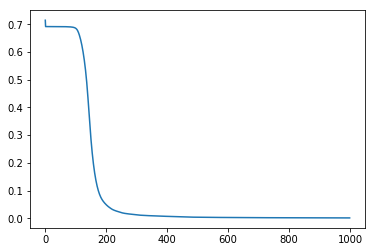

Neural Network Accuracy (In Percentage) = 75.6


In [47]:
# Run Neural Net Classifier for k_list
k_list = [10, 30, 50, 70, 80, 100, 120, 180, 600, 900, 1500, 3000, 3500, 4000, 5000]
accuracy_list = []
for k in k_list:
    accuracy = neural_net_classfier(k)
    accuracy_list.append(accuracy)

In [48]:
print(accuracy_list)

[60.0, 69.6, 69.0, 71.2, 72.39999999999999, 72.0, 72.8, 73.8, 73.8, 75.4, 73.6, 77.60000000000001, 78.2, 75.6, 75.6]


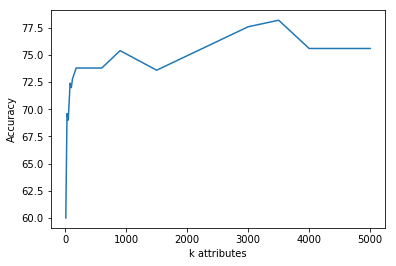

In [49]:
# Plotting Graph
import numpy as np
import matplotlib.pyplot as plt

plt.plot(k_list, accuracy_list, label="line")  
plt.xlabel('k attributes')
plt.ylabel('Accuracy')
plt.show()

So from the graph we can see that the accuracy is increasing as we increase the number of attributes (till k < 1500) but at certain points it decreases (like k = 1500) and then again increases (at k = 3000) and then decrease at (k=3500), it does not keep on increasing continuously but shows dips at certain points and then again start increasing. No, we didn't face many difficulties in running the experiment, but it required more time for performing a neural net.